### 3.5. 군집
#### 3.5.1 k-평균 군집

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

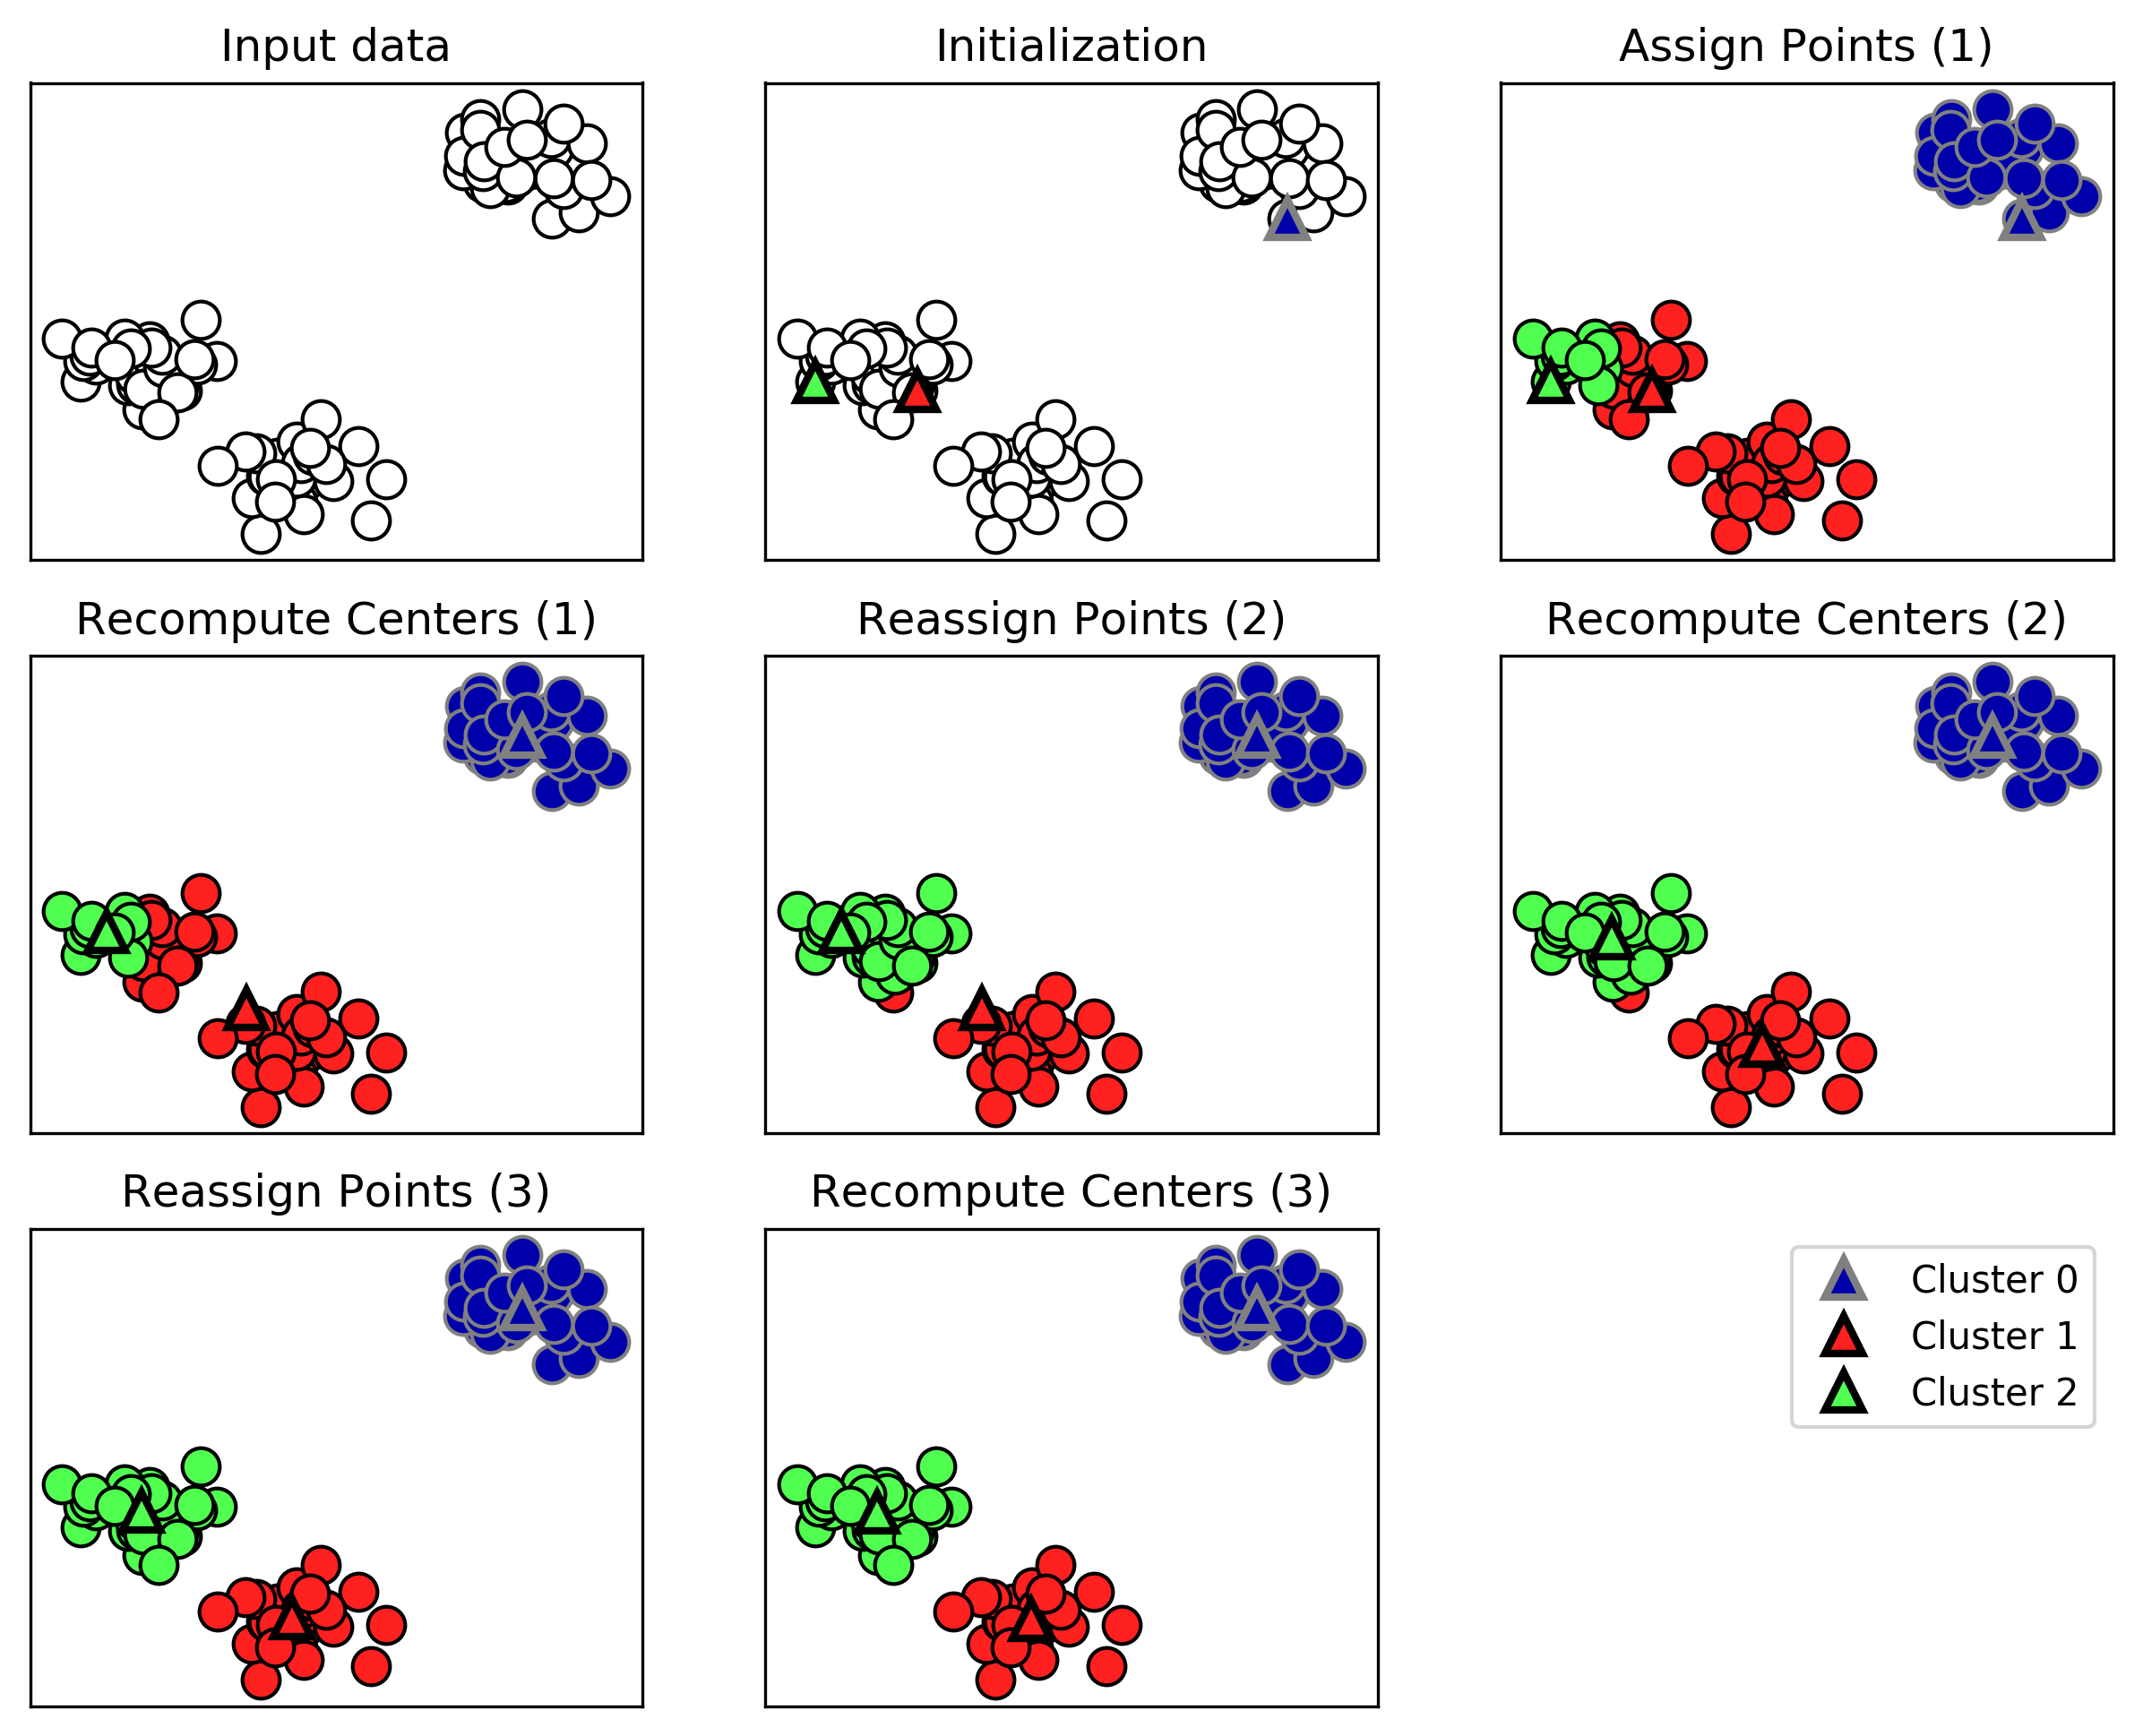

In [2]:
mglearn.plots.plot_kmeans_algorithm()

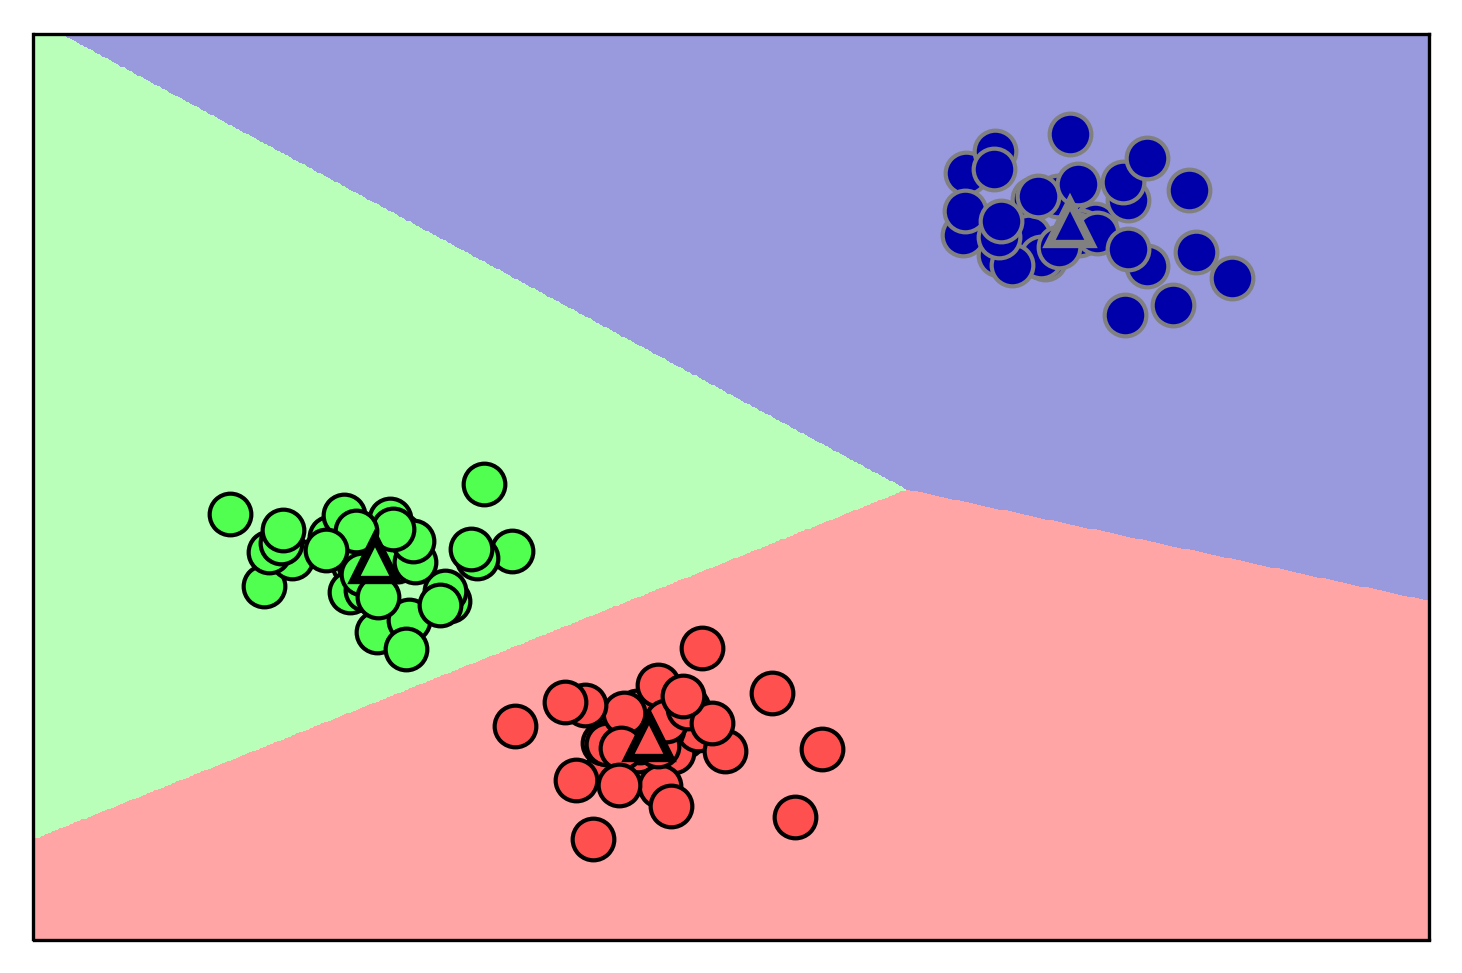

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
print(X[0], X[1], X[2])
print(y[0], y[1], y[2])

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

[-0.794  2.105] [-9.152 -4.813] [-11.442  -4.458]
0 1 1


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [6]:
print("Cluster memberships:\n{}".format(kmeans.predict(X)))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


[[ -6.582  -8.172]
 [ -1.471   4.337]
 [-10.049  -3.86 ]]


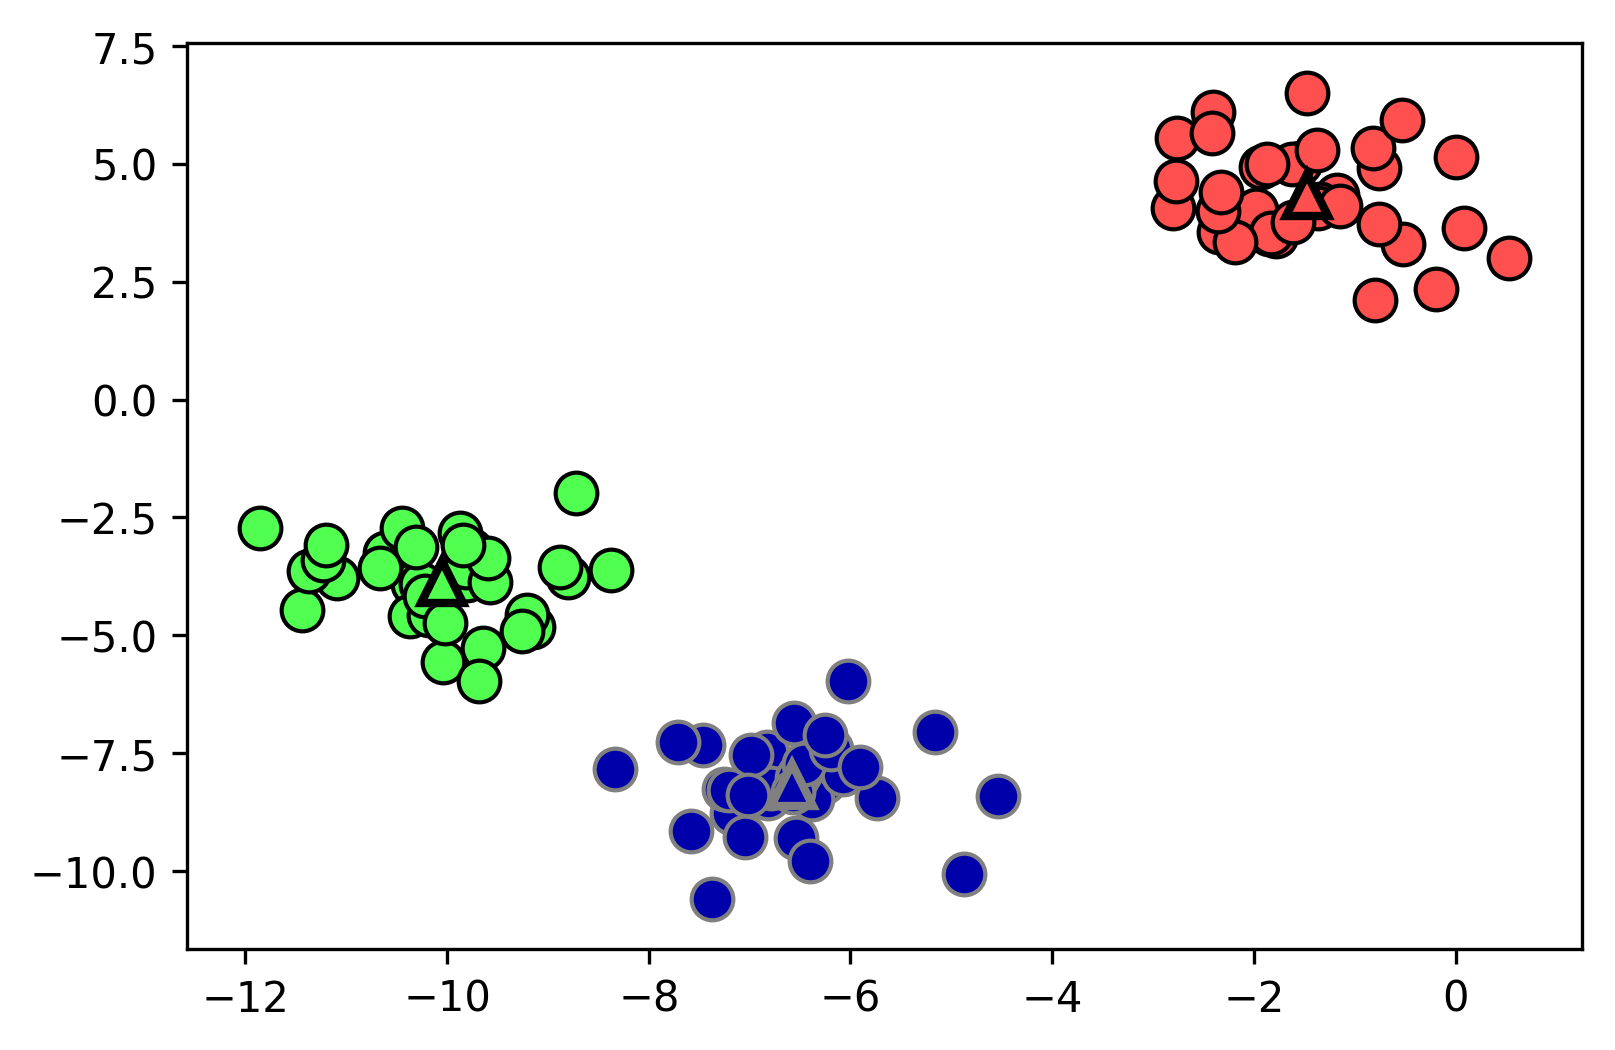

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

print(kmeans.cluster_centers_)

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=2
)

- 클래스터 수를 2로 제한하거나 5로 늘림

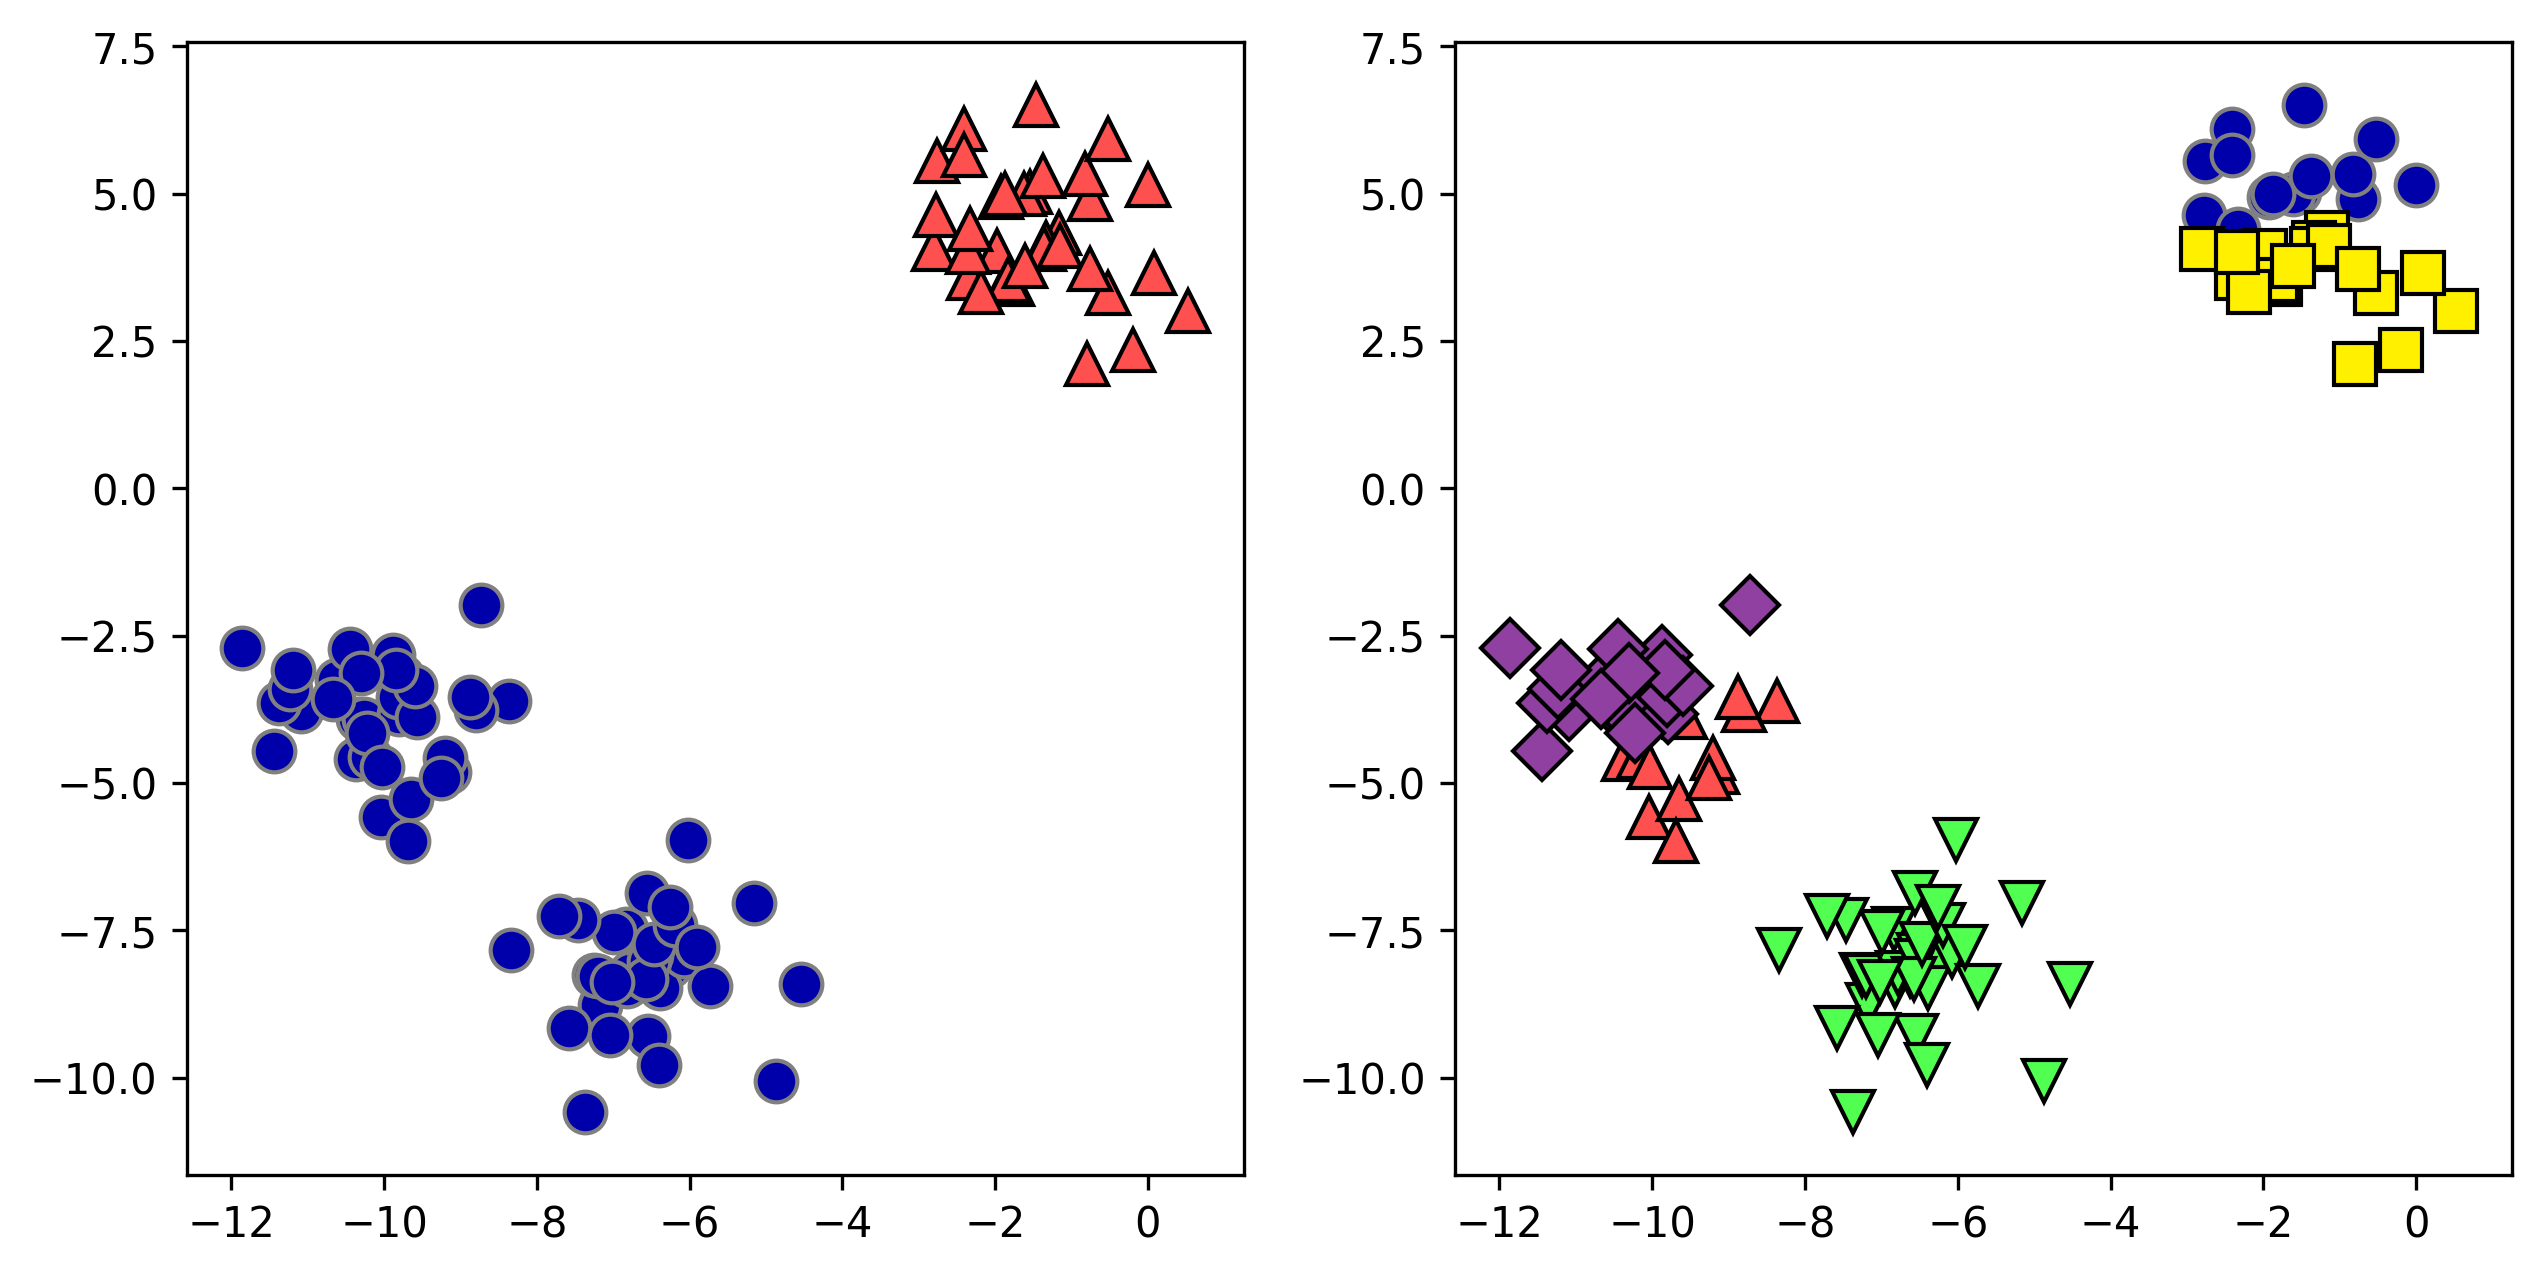

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

##### Failure cases of k-Means
- k-Means는 클러스터 중심 사이에 정확히 중간에 Decision Boundary를 긋는다.
- fit_predict
  - 훈련 데이터 셋트로 클러스터를 구성하고 각 데이터 포인트마다 구성된 클러스터의 소속 정보를 얻기 위한 함수

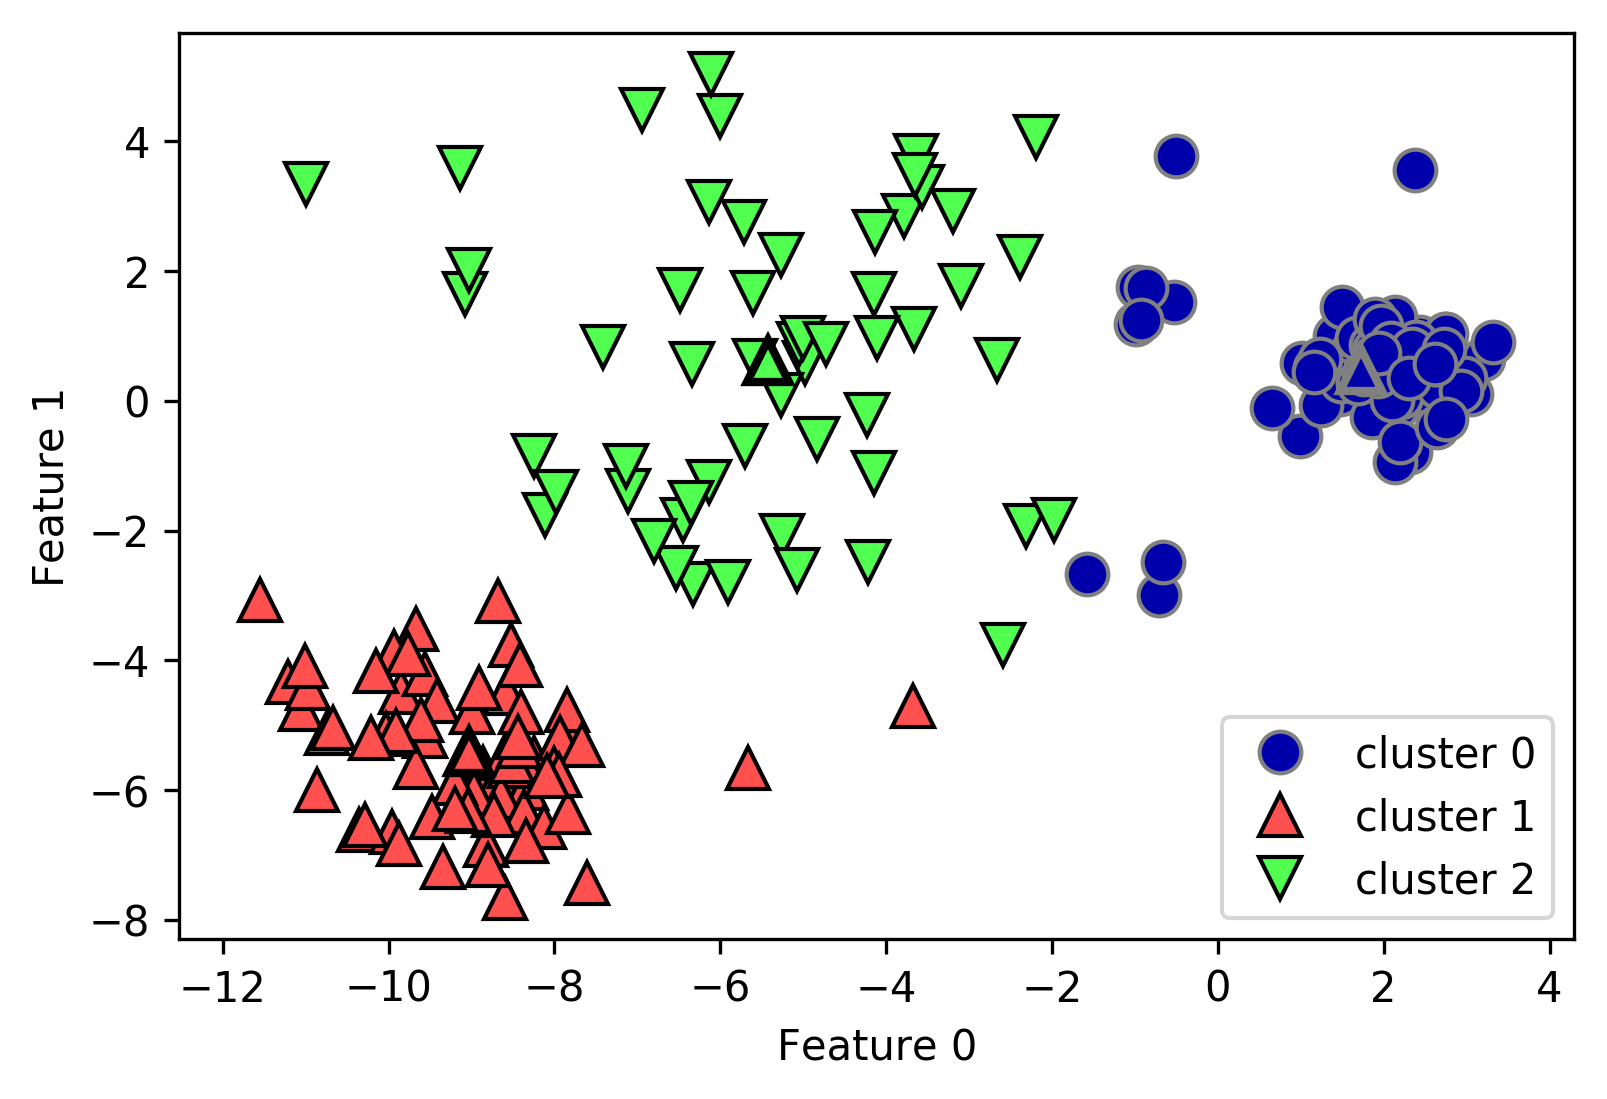

In [9]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

kmeans = KMeans(n_clusters=3, random_state=0)

y_pred = kmeans.fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=2
)

plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- k-Means에서는 클러스터에서 모든 방향이 동일하게 중요하게 간주됨

In [10]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
print(transformation)
X = np.dot(X, transformation)

[[ 0.608 -0.637]
 [-0.409  0.853]]


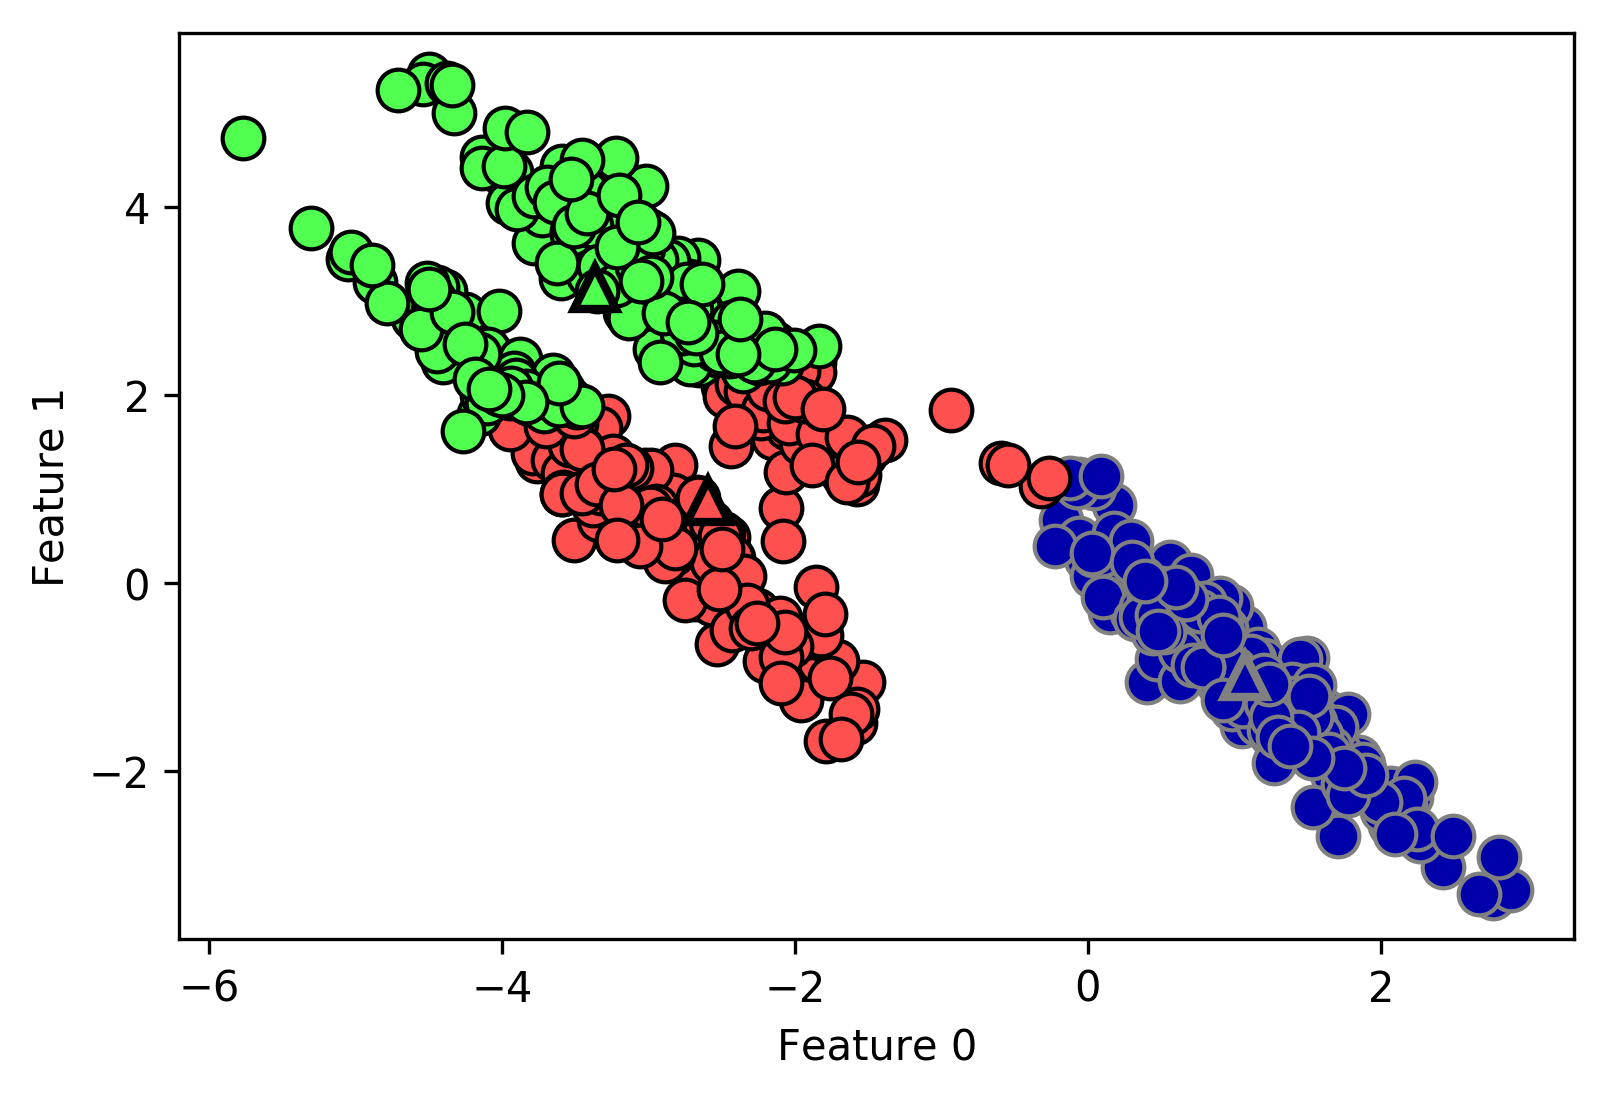

In [11]:
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=2
)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 데이터 분포 형태가 복잡하다면 k-Means의 클러스터링 성능은 매우 나빠짐

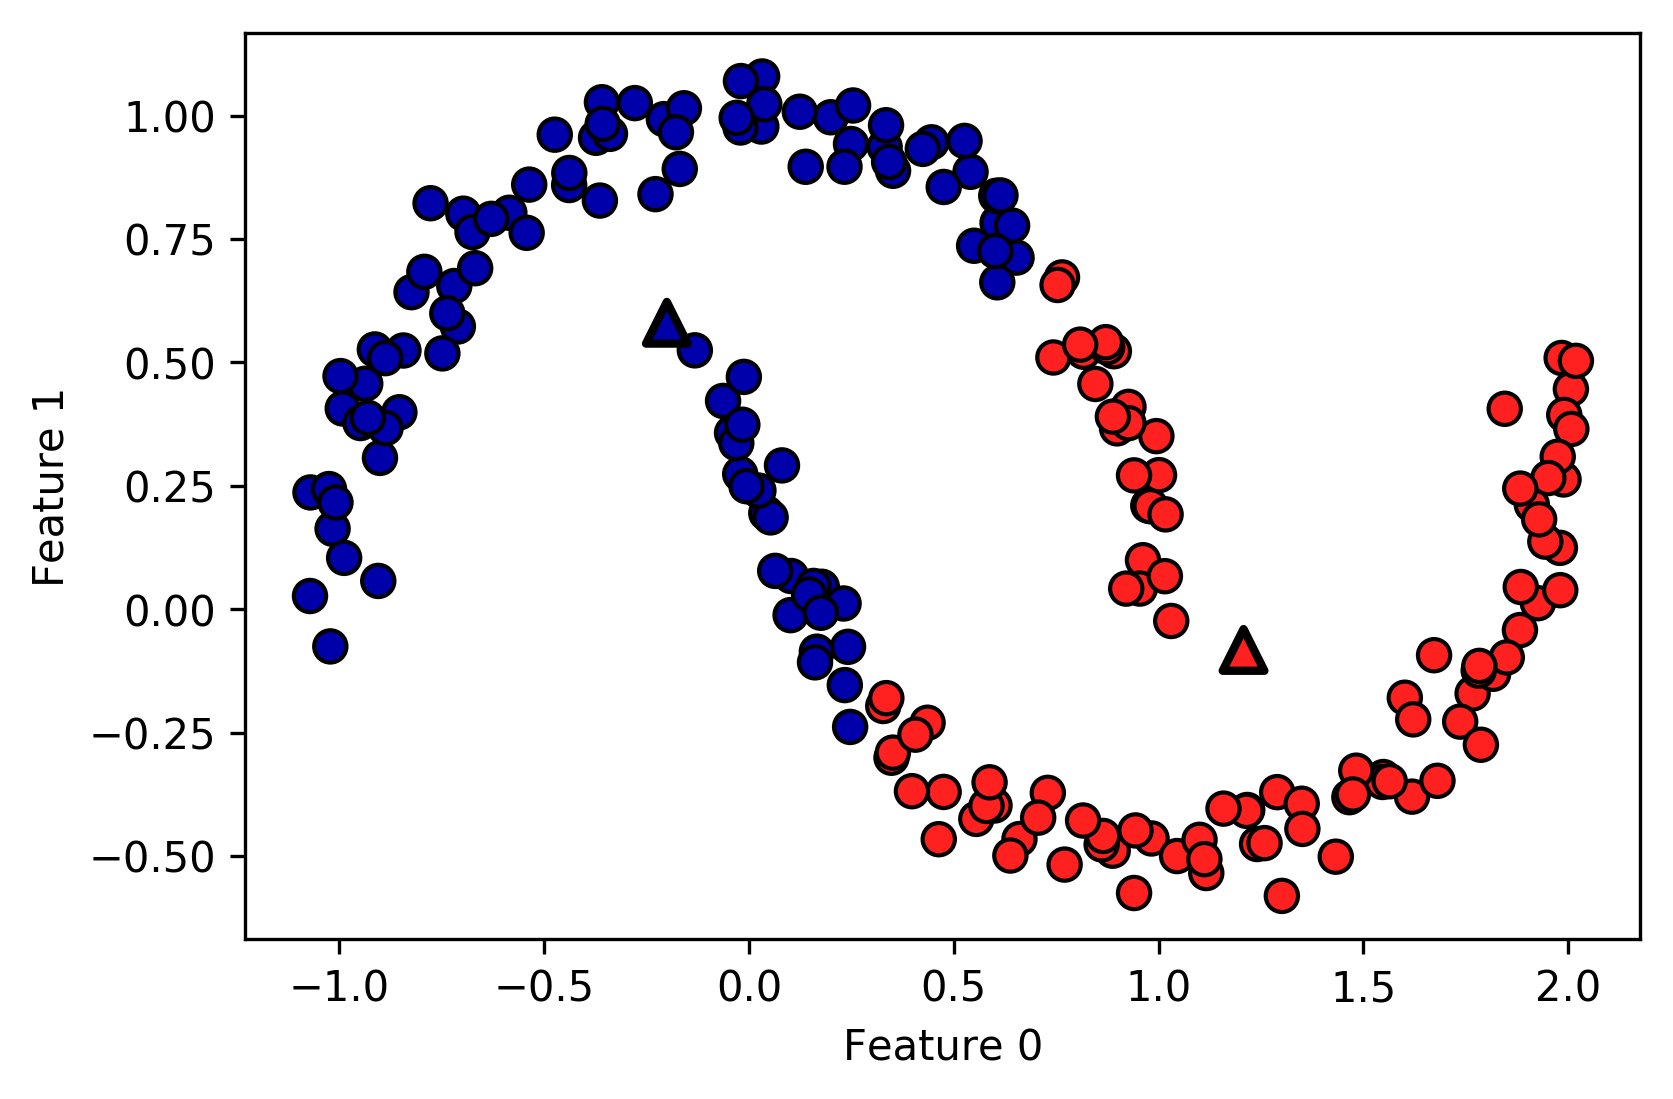

In [12]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')

plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker='^', 
    c=[mglearn.cm2(0), mglearn.cm2(1)], 
    s=100, 
    linewidth=2,
    edgecolor='k'
)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### Vector Quantization (or Seeing k-Means as Decomposition)
- k-Means는 각 클러스터들의 중심이 해당 클러스터에 속한 데이터들을 대표한다고 간주할 수 있음
- 이렇게 각각의 데이터가 하나의 요소로 요약되는 상황을 Vector Quantization (벡터 양자화)라고 함
- [Note] Quantization
  - In mathematics and digital signal processing, it is the process of mapping input values from a large set (often a continuous set) to output values in a (countable) smaller set. 
- [Note] Vector Quantization
  - It works by mapping a large set of points (vectors) into groups having approximately the same number of points closest to them. 

In [27]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

print("people.images.shape: {}".format(people.images.shape))
print("An image shape: {}".format(people.images[0].shape))
print("Number of classes: {}".format(len(people.target_names)))
print()
print("people.data.shape: {}".format(people.data.shape))
print("people.target.shape: {}".format(people.target.shape))
print()
print("people.target[0]: {}".format(people.target[0]))
print("people.target_names[0]: {}".format(people.target_names[0]))

people.images.shape: (3023, 87, 65)
An image shape: (87, 65)
Number of classes: 62

people.data.shape: (3023, 5655)
people.target.shape: (3023,)

people.target[0]: 61
people.target_names[0]: Alejandro Toledo


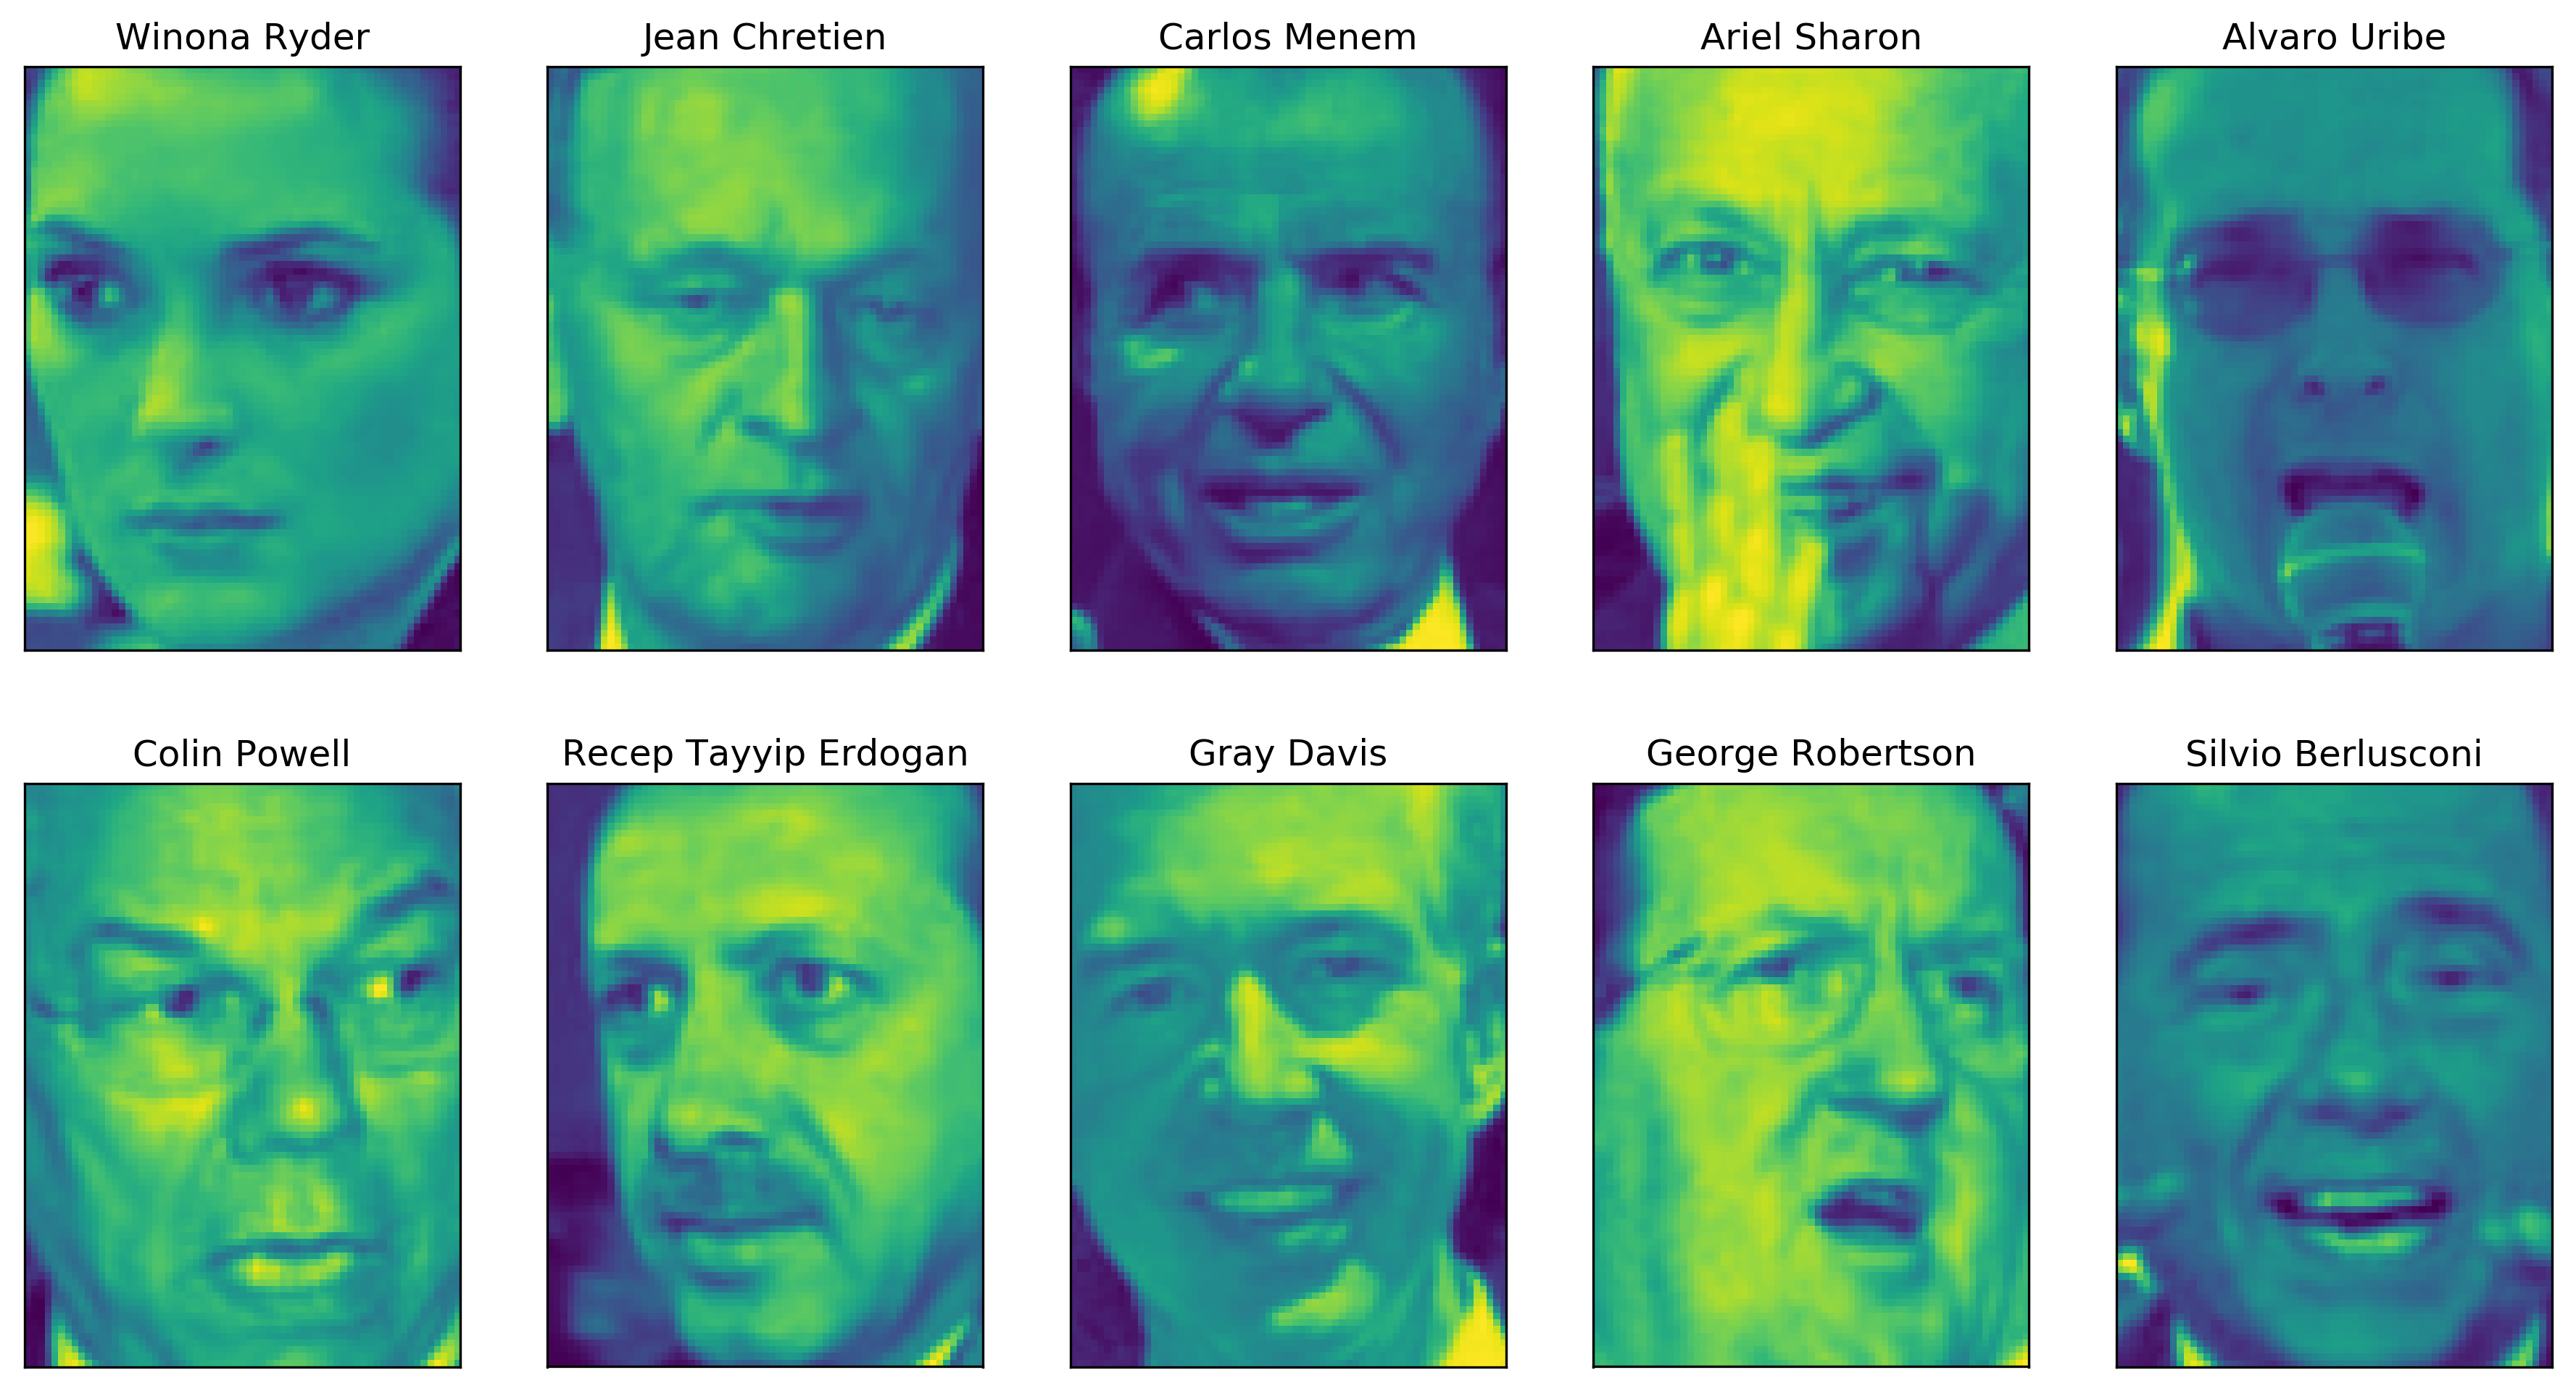

In [28]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [29]:
# count how often each target appears
counts = np.bincount(people.target)
print(counts)
print()
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("[{0:2}] {1:23} {2:3}".format(i, name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]

[ 0] Alejandro Toledo         39   [ 1] Alvaro Uribe             35   [ 2] Amelie Mauresmo          21   
[ 3] Andre Agassi             36   [ 4] Angelina Jolie           20   [ 5] Ariel Sharon             77   
[ 6] Arnold Schwarzenegger    42   [ 7] Atal Bihari Vajpayee     24   [ 8] Bill Clinton             29   
[ 9] Carlos Menem             21   [10] Colin Powell            236   [11] David Beckham            31   
[12] Donald Rumsfeld         121   [13] George Robertson         22   [14] George W Bush           530   
[15] Gerhard Schroeder       109   [16] Gloria Macapagal Arroyo  44   [17] Gray Davis               26   
[18] Guillermo Coria          30   [19] Hamid Karzai             22   [20] Hans Blix                39   
[21]

In [36]:
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
#     print("np.where(people.target == {0}):\n{1}".format(target, np.where(people.target == target)))
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (1547, 5655)
y_train.shape: (1547,)
X_test.shape: (516, 5655)
y_test.shape: (516,)


In [38]:
from sklearn.decomposition import PCA
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
print("pca.transform(X_test).shape: {}".format(pca.transform(X_test).shape))
print("X_reconstructed_pca.shape: {}".format(X_reconstructed_pca.shape))

print()

#100개의 중심들 중(kmeans.cluster_centers_)에서 
#kmeans.predict(X_test)에 의한 총 494개의 클러스터 Index에 해당하는 것들로만
#494번 k-Means 중심들을 추출하여 X_reconstructed_kmeans에 저장  
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
print("kmeans.predict(X_test).shape: {}".format(kmeans.predict(X_test).shape))
print("kmeans.cluster_centers_.shape: {}".format(kmeans.cluster_centers_.shape))
print("X_reconstructed_kmeans.shape: {}".format(X_reconstructed_kmeans.shape))

print()

X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
print("nmf.transform(X_test).shape: {}".format(nmf.transform(X_test).shape))
print("nmf.components_.shape: {}".format(nmf.components_.shape))
print("X_reconstructed_nmf.shape: {}".format(X_reconstructed_nmf.shape))

pca.transform(X_test).shape: (516, 100)
X_reconstructed_pca.shape: (516, 5655)

kmeans.predict(X_test).shape: (516,)
kmeans.cluster_centers_.shape: (100, 5655)
X_reconstructed_kmeans.shape: (516, 5655)

nmf.transform(X_test).shape: (516, 100)
nmf.components_.shape: (100, 5655)
X_reconstructed_nmf.shape: (516, 5655)


kmeans.cluster_centers_.shape: (100, 5655)
pca.components_.shape: (100, 5655)
nmf.components_.shape: (100, 5655)


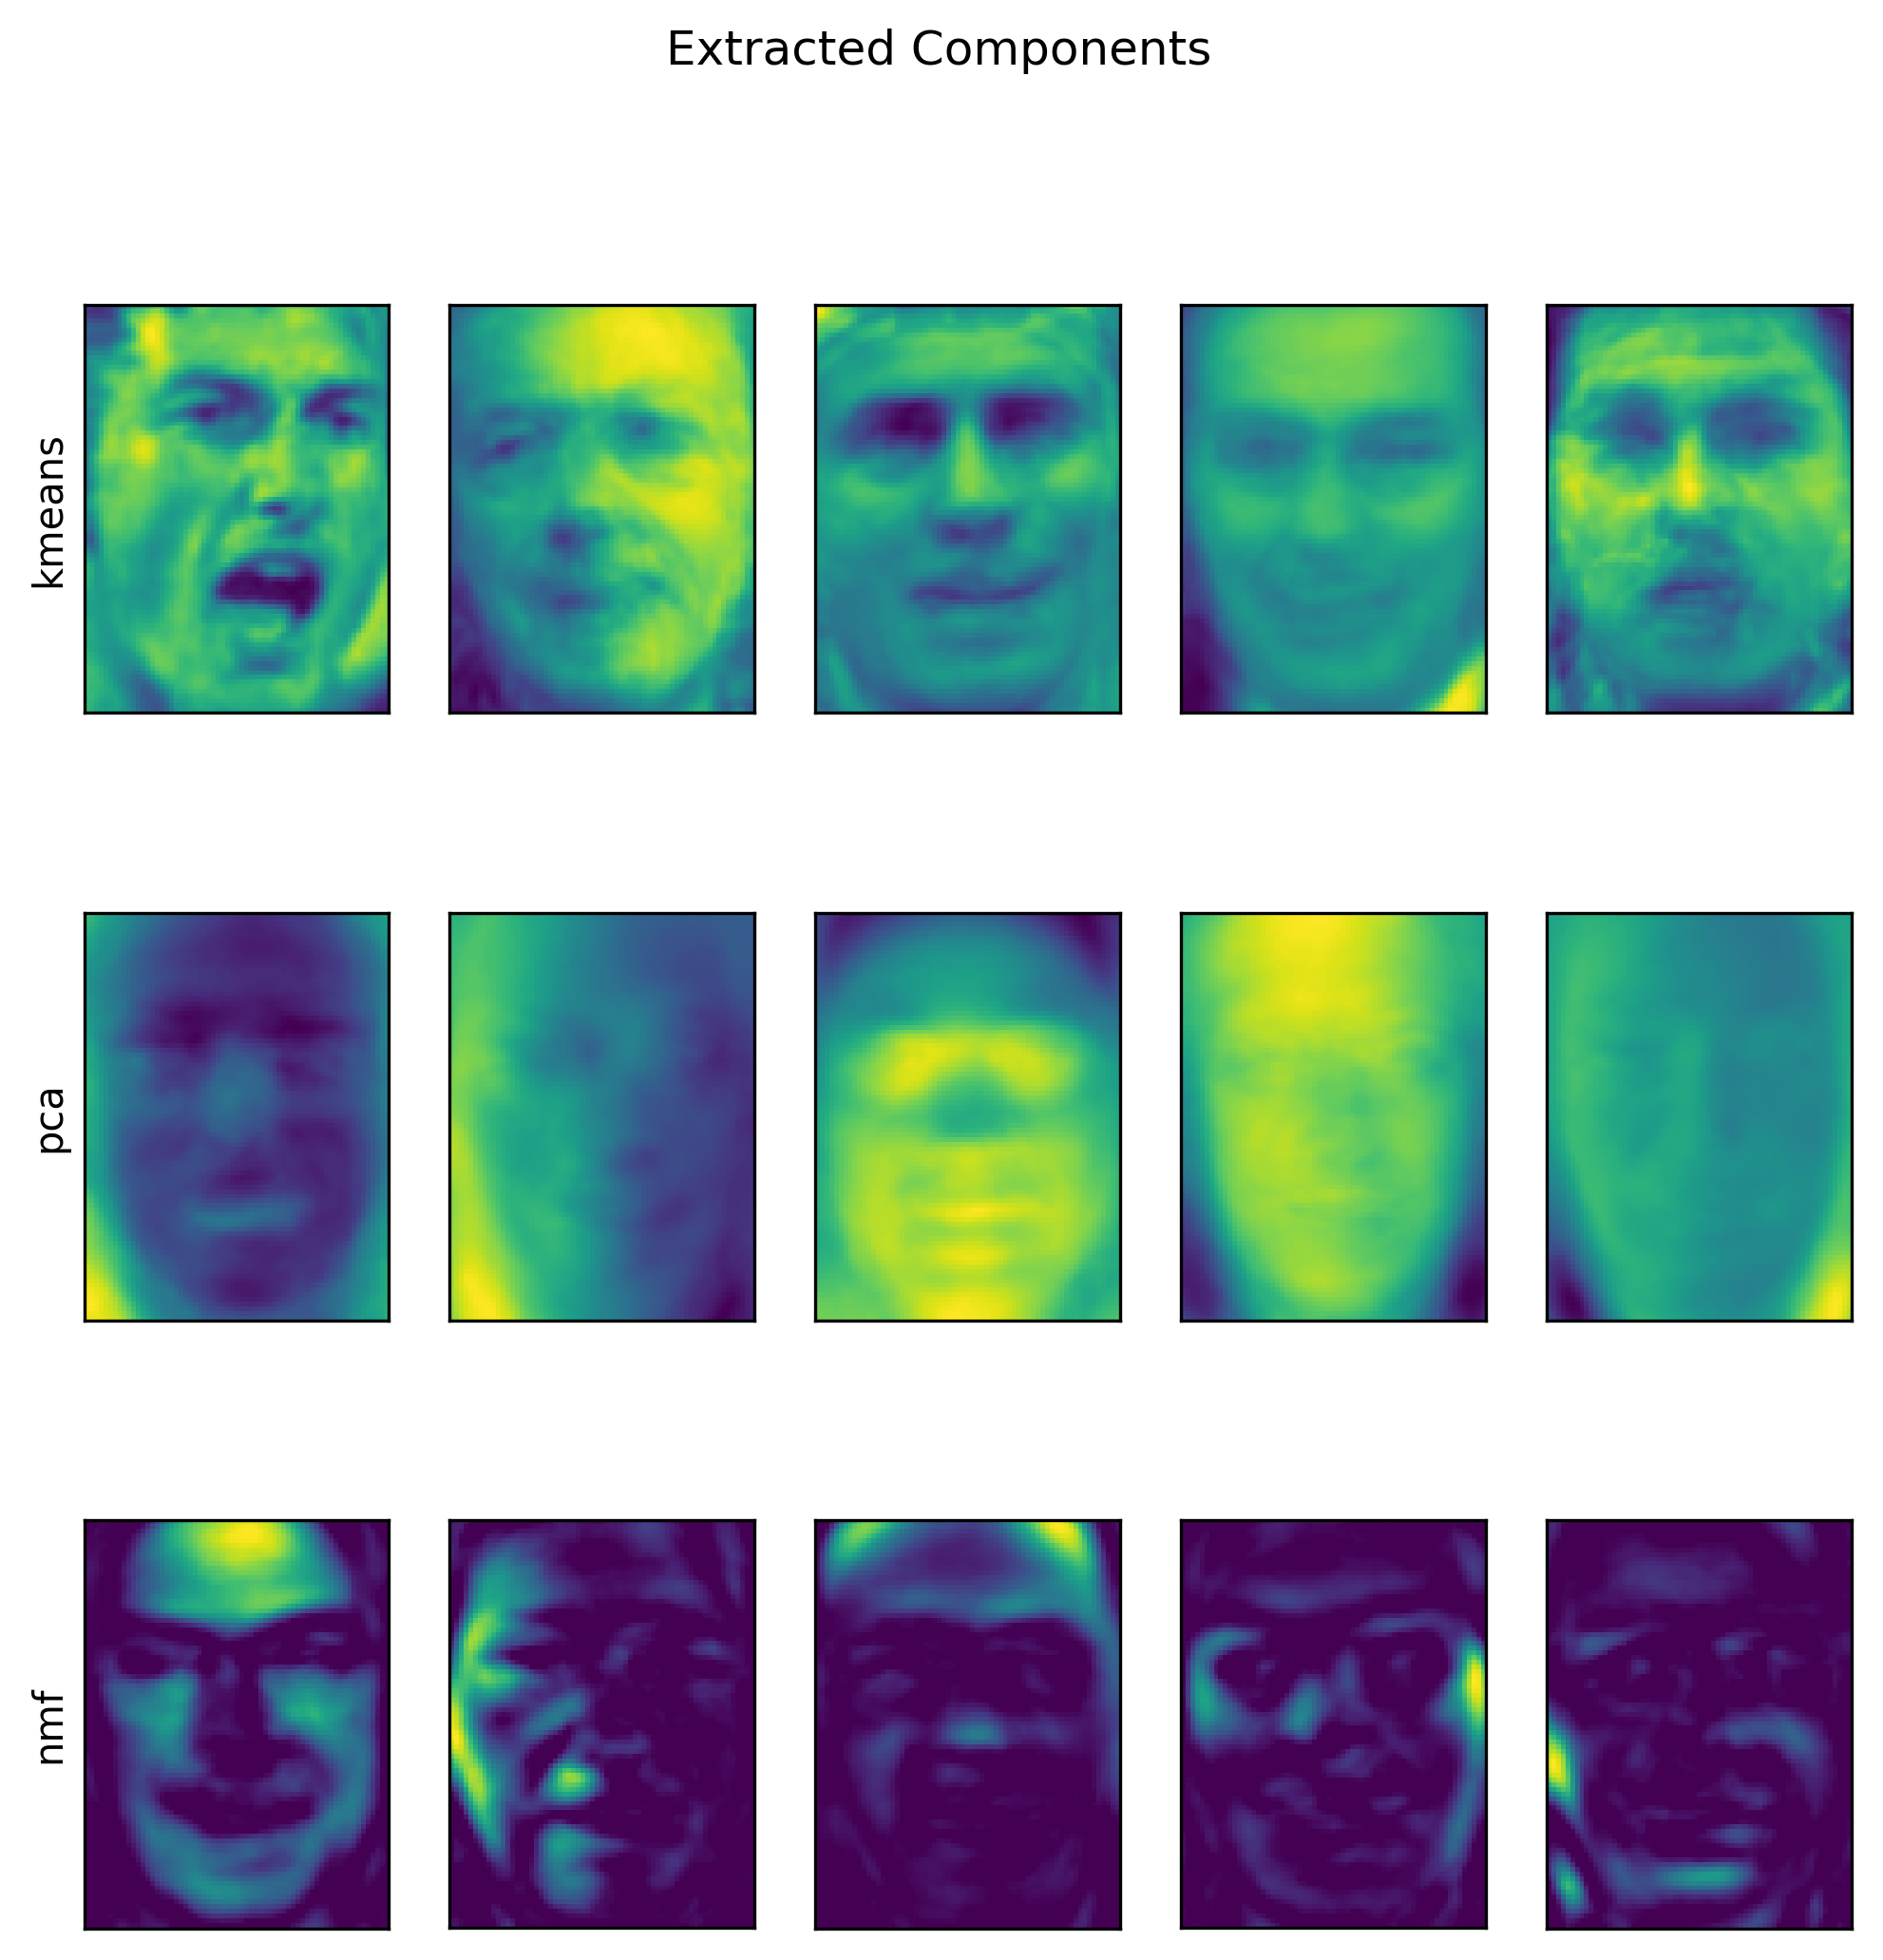

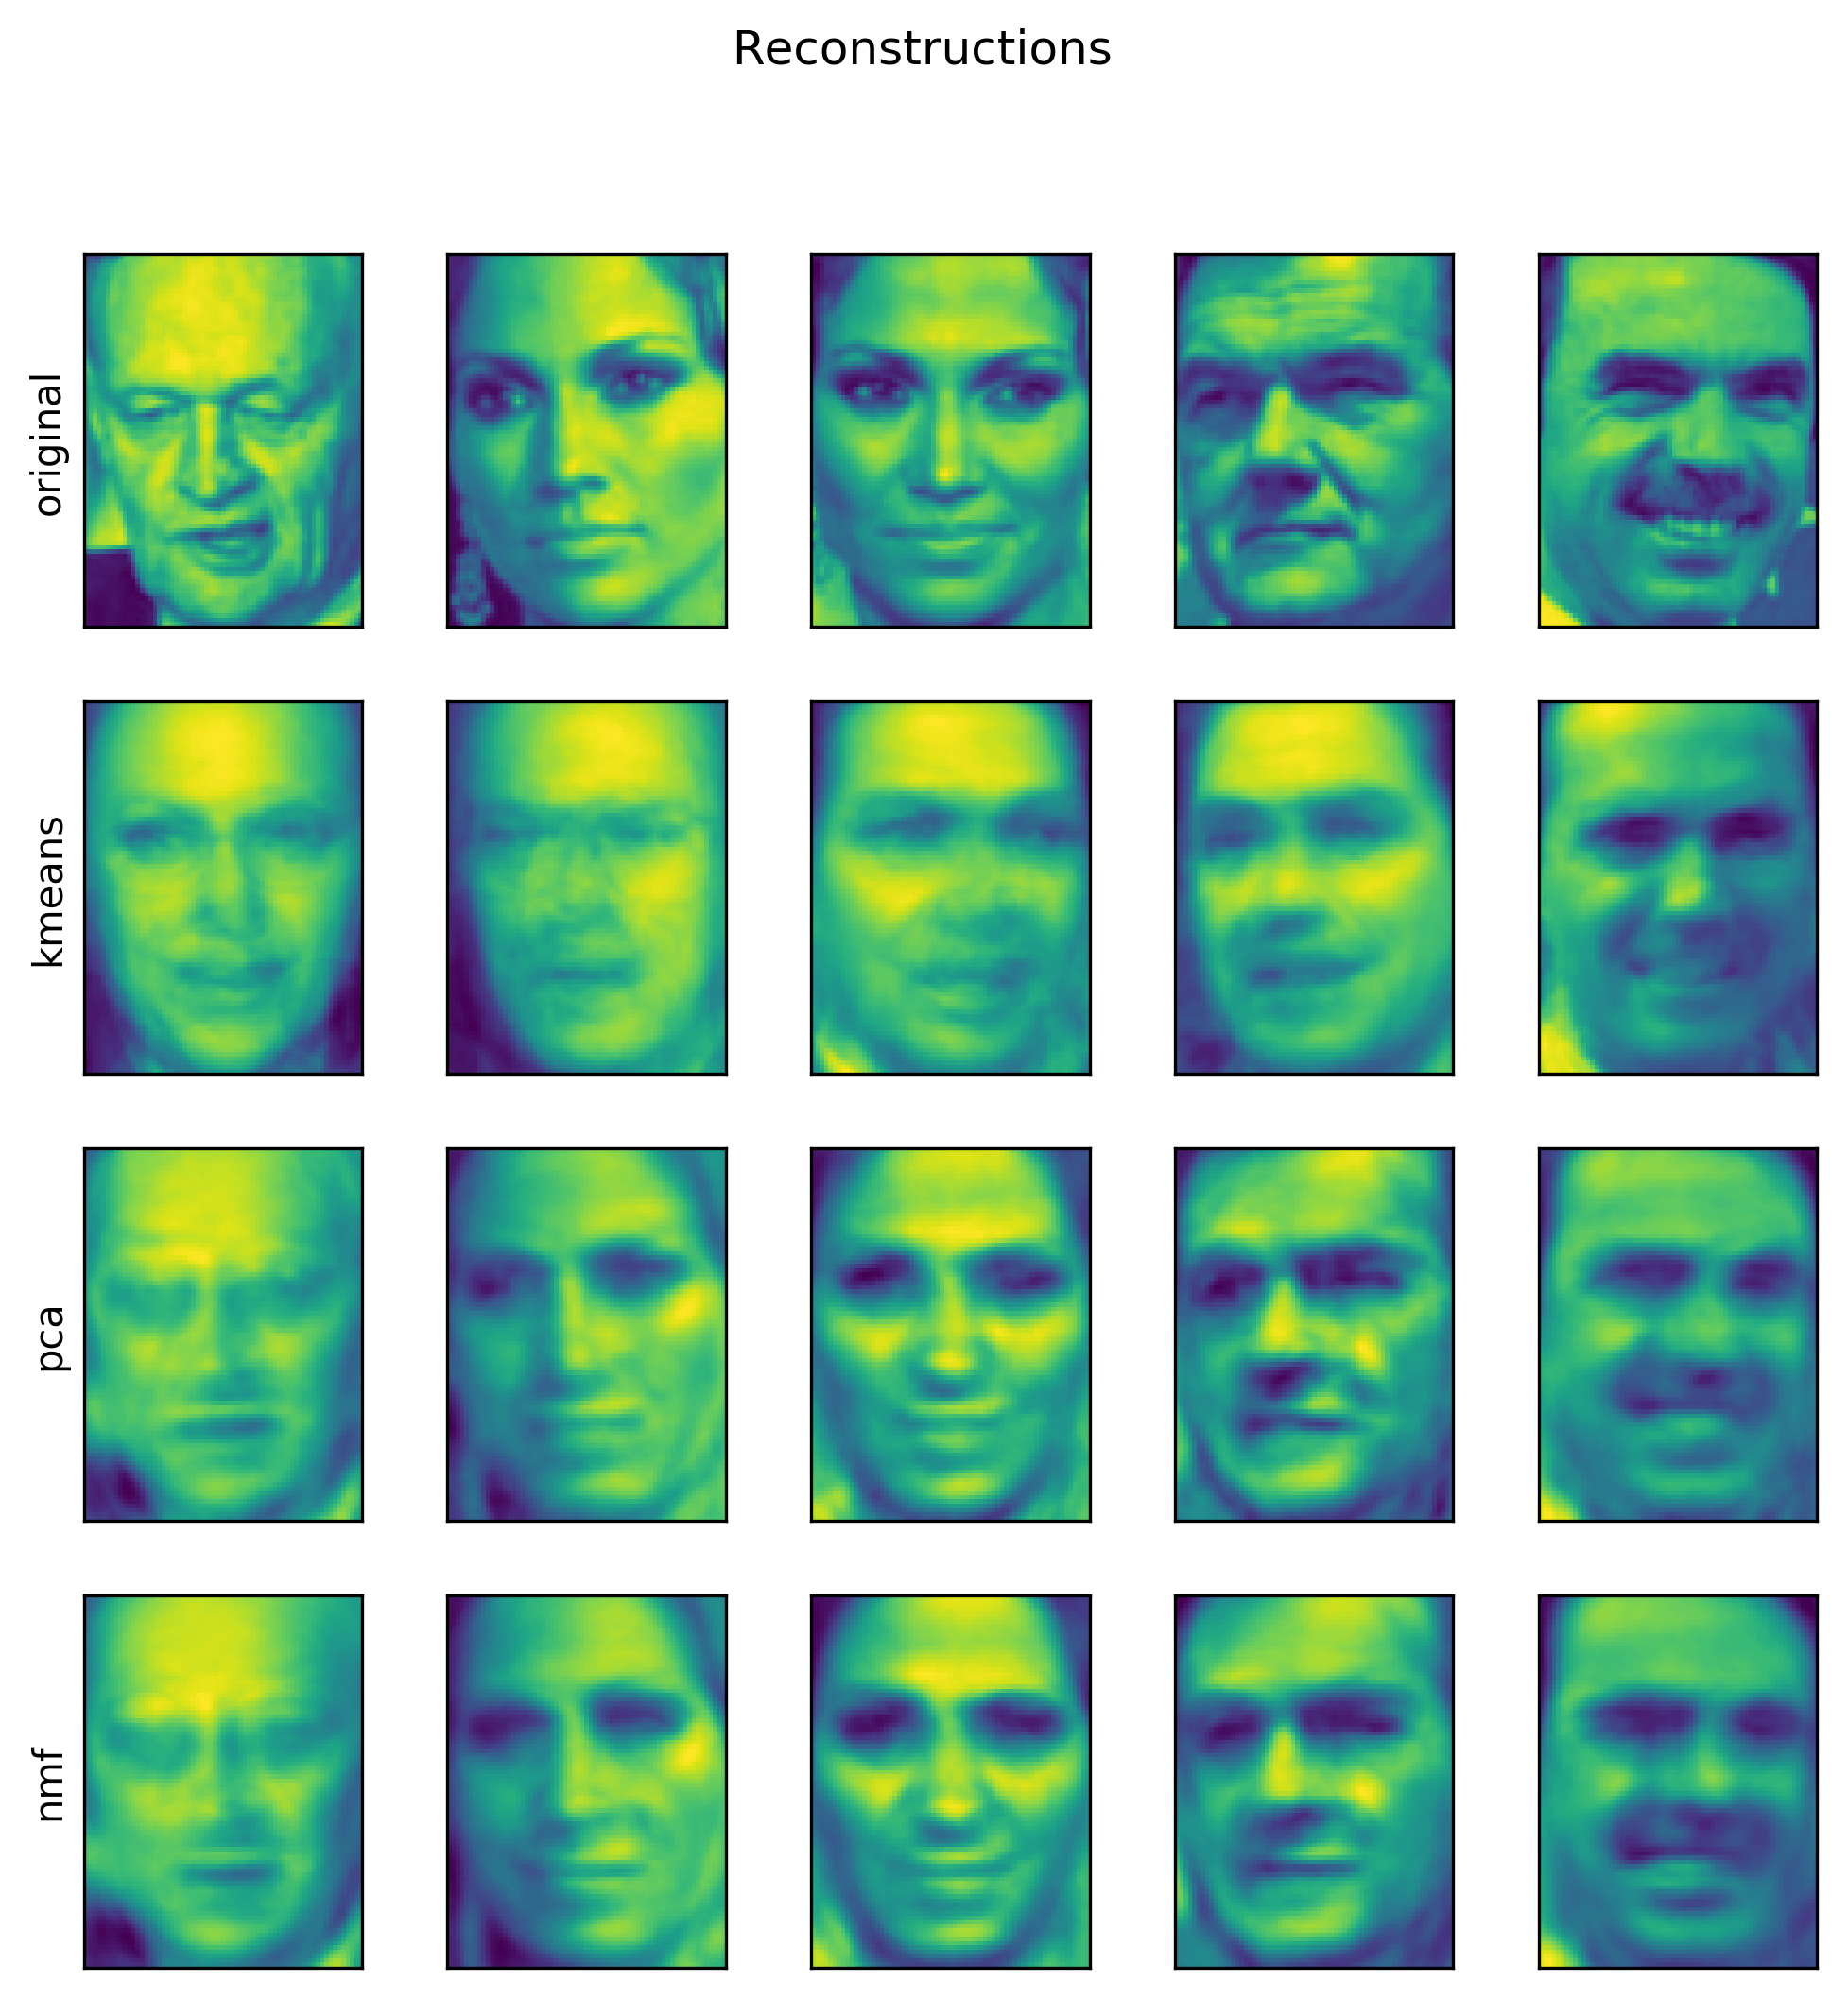

In [39]:
print("kmeans.cluster_centers_.shape: {}".format(kmeans.cluster_centers_.shape))
print("pca.components_.shape: {}".format(pca.components_.shape))
print("nmf.components_.shape: {}".format(nmf.components_.shape))

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, 
        kmeans.cluster_centers_, 
        pca.components_, 
        nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T,
        X_test,
        X_reconstructed_kmeans,
        X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

- k-Means로 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있음

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


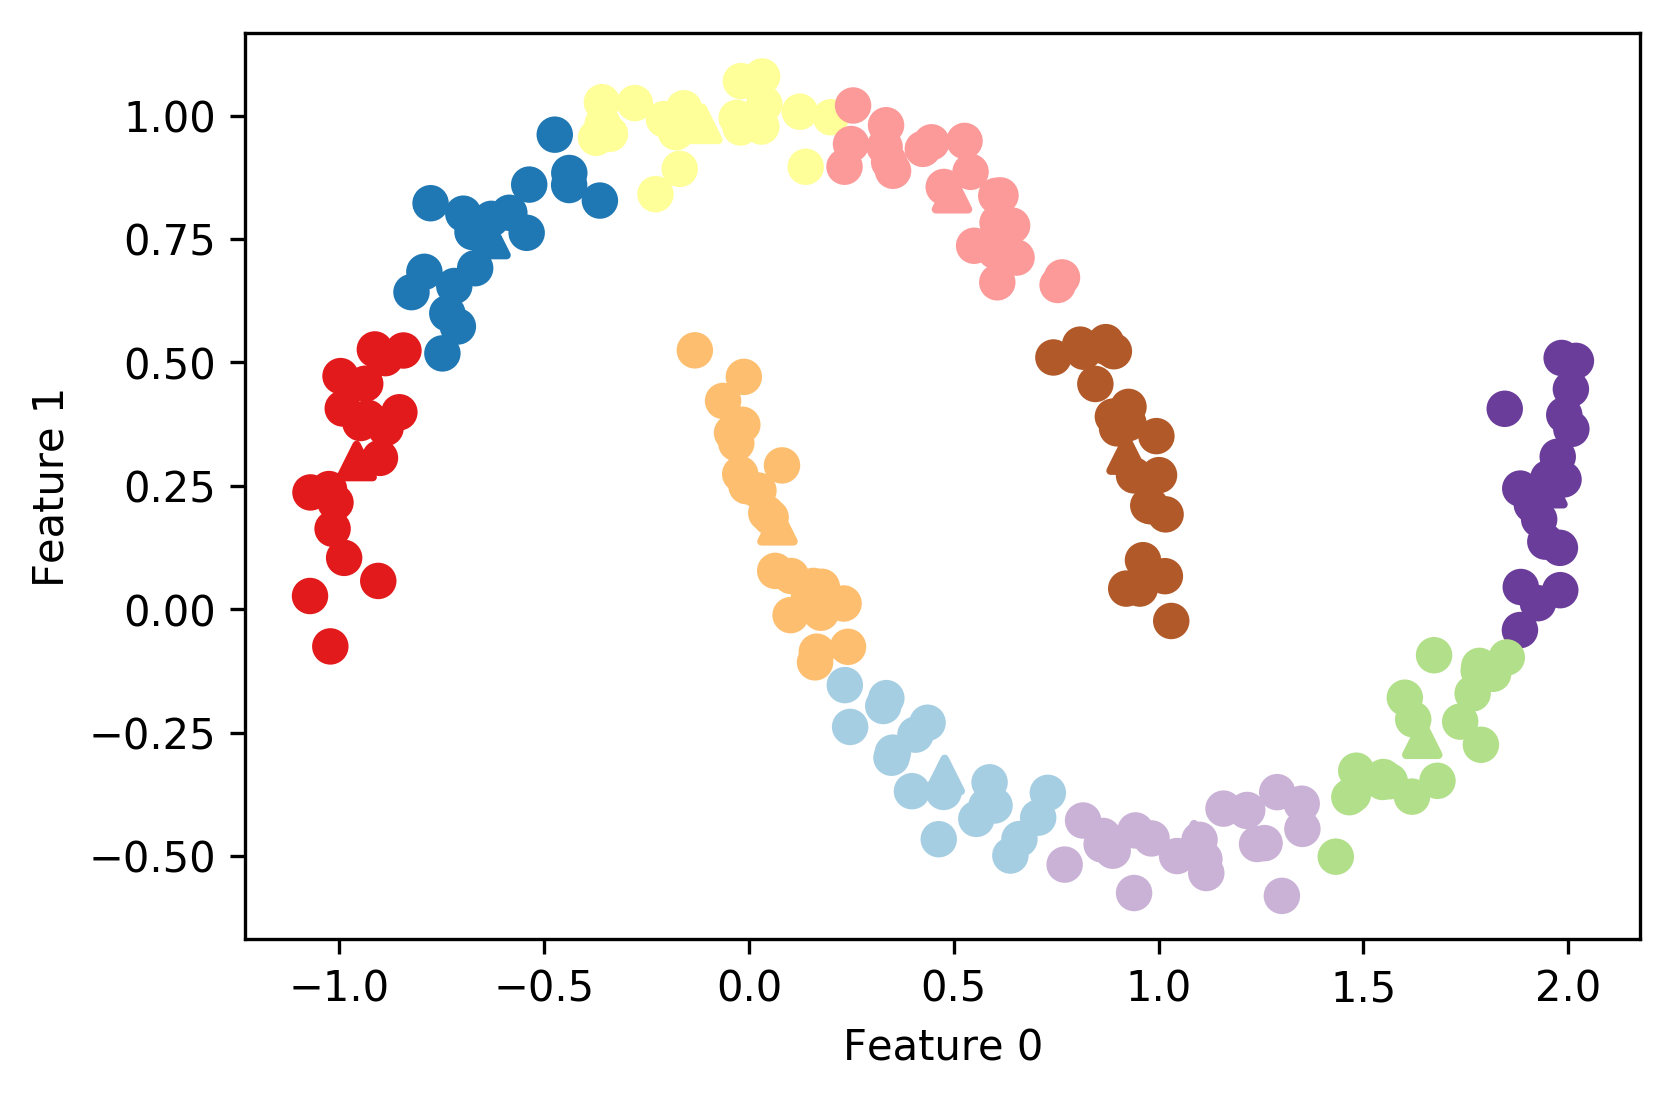

In [40]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=60,
    marker='^', 
    c=range(kmeans.n_clusters), 
    linewidth=2, 
    cmap='Paired'
)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

- kmeans.transform(X)
  - 각 데이터마다 대응되는 중심까지의 거리를 특성으로 사용하는 데이터 생성

In [41]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[ 0.922  1.466  1.14  ...,  1.166  1.039  0.233]
 [ 1.142  2.517  0.12  ...,  0.707  2.204  0.983]
 [ 0.788  0.774  1.749 ...,  1.971  0.716  0.944]
 ..., 
 [ 0.446  1.106  1.49  ...,  1.791  1.032  0.812]
 [ 1.39   0.798  1.981 ...,  1.978  0.239  1.058]
 [ 1.149  2.454  0.045 ...,  0.572  2.113  0.882]]


- 대규모 데이터에 대한 k-Means 적용방법
  - MiniBatchKMeans 사용
    - batch_size의 기본 값: 100
    - 전체 데이터에서 100개를 임의로 선택하여 클러스터 중심 계산

- k-Means의 단점
  - 난수 초기화에 따라 k-Means 클러스터링 결과 달라짐
    - scikit-learn의 대처 방법
      - 10개의 서로 다른 난수 초기값을 적용하여 k-Means를 수행하고 각 결과에서 산출되는 클러스터 분산의 합이 작은 것을 최종 결과로 택함
  - 클러스의 모양이 제한적
    - 클러스터 경계가 각 클러스터 중심에서 동일한 거리에 존재
  - 사용자가 클러스터의 개수를 직접 지정
  